In [1]:
# import gdown
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
# gdown.download(url='https://drive.google.com/uc?id=1fte_iz-y-xBqFTyrji58pckalZTliJts', output='B22CS090_train.py')
# gdown.download(url='https://drive.google.com/uc?id=11NTxipQneekGe6mnPclStnABdzV6yTJL', output='B22CS090_test.py')

In [3]:
n = 10000

class MakeTxt:
    def __init__(self):
        self.train_data = None
        self.test_data = None
        self.x = None
        self.y = None
        self.data = None


    def generateData(self):
        self.x = np.empty((n, 4))

        #making 4 arbitrary random seeds to ensure reproducibility
        random_seed = [3, 10, 7, 23]

        for i, seed in enumerate(random_seed):
            np.random.seed(seed)

            #generating a feature column from uniform distn
            random_val = np.random.uniform(low=-100, high=100, size=10000)
            random_val = np.round(random_val, 2)

            self.x[:, i] = random_val

        mean = self.x.mean(axis=0)
        std = self.x.std(axis=0)

        self.x = (self.x - mean) / std

        #generating random weights
        w_all = np.random.uniform(-10, 10, 5)
        w_init = w_all[:4]
        bias_init = w_all[4]

        self.y = (self.x @ w_init.T) + bias_init
        #generating 'true' class labels
        self.y = np.where(self.y >= 0., 1, 0)

        print(np.bincount(self.y))

        #splitting data set into training and test sets
        x_train, x_test, y_train, y_test = train_test_split(np.round(self.x, 3), self.y, test_size=0.3, stratify=self.y, random_state=3, shuffle=True)

        self.data = np.empty((n, 5))
        self.data[ : int(0.7 * n), : 4], self.data[ : int(0.7 * n), 4] = x_train, y_train
        self.data[int(0.7 * n) : , : 4], self.data[int(0.7 * n) : , 4] = x_test, y_test

        self.train_data = np.empty((int(n * 0.7), 5))
        self.train_data[:, :4] = x_train
        self.train_data[:, 4] = y_train

        self.test_data = np.empty((int(n * 0.3), 4))
        self.test_data = x_test


    def toTxt(self):
        #writing whole data set to data.txt
        with open('B22CS090_data.txt', 'w') as file:
            for i in range(self.data.shape[0]):
                for j in range(self.data.shape[1]):
                    file.write(str(self.data[i][j]) + ' ')

                file.write('\n')

        #writing training set to train.txt
        with open('B22CS090_train.txt', 'w') as file:
            file.write(f'{int(0.7 * len(self.x))}\n')

            for i in range(len(self.train_data)):
                for j in range(len(self.train_data[0])):

                    if j == len(self.train_data[0]) - 1:
                        file.write(str(int(self.train_data[i][j])) + ' ')
                    else:
                        file.write(str(self.train_data[i][j]) + ' ')
                file.write('\n')

        #writing test set to test.txt
        with open('B22CS090_test.txt', 'w') as file:
            file.write(f'{int(0.3 * len(self.x))}\n')

            for i in range(len(self.test_data)):
                for j in range(len(self.test_data[0])):
                    file.write(str(self.test_data[i][j]) + ' ')
                file.write('\n')

In [4]:
txt = MakeTxt()
txt.generateData()
txt.toTxt()

[4990 5010]


Training Accuracy: 0.9694847423711856
Training Over and Weights are saved
Training Accuracy: 0.9876
Training Over and Weights are saved
Training Accuracy: 0.9908571428571429
Training Over and Weights are saved


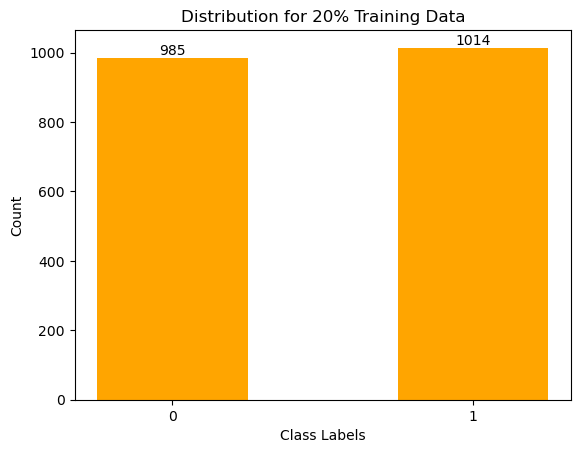

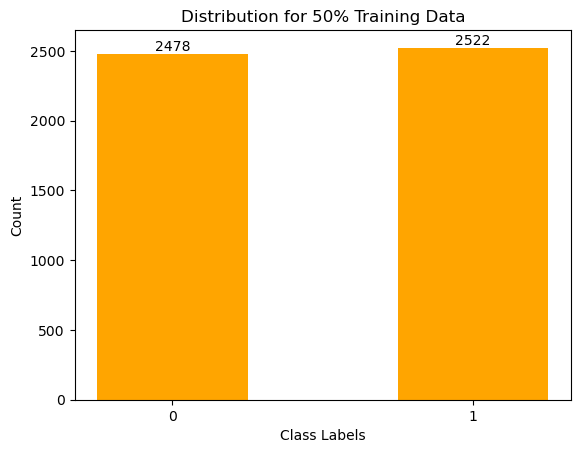

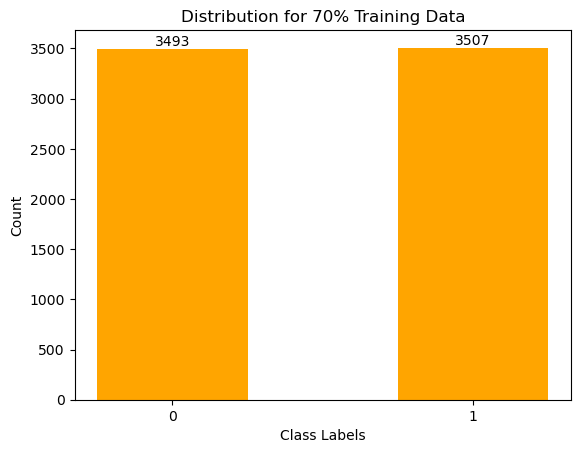

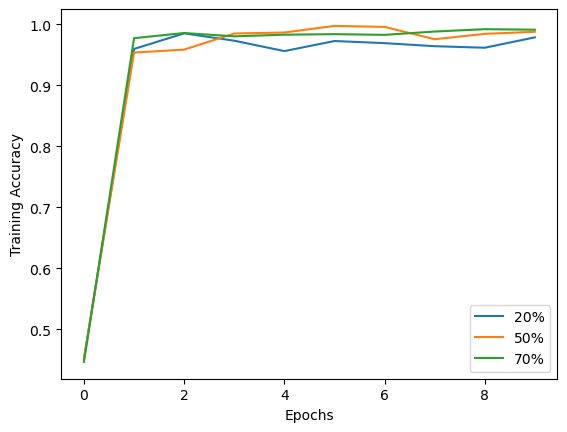

In [5]:
%run B22CS090_train.py train.txt

In [6]:
%run B22CS090_test.py test.txt

[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]


<h3><b>Question 2</b></h2>
<p>Working with LFW dataset</p>

In [7]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4, color=False)

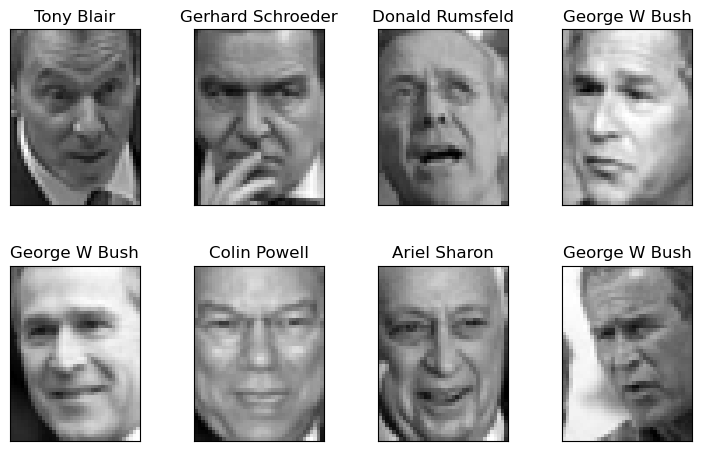

In [8]:
#getting 2D images, titles, corresponding indexes of titles and dimensions of image
images = lfw_people.images
y = lfw_people.target
titles = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(8):
        plt.subplot(n_row, n_col, i + 1)
        #imshow handles normalised pixel values as well
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(images[:8], titles[y[:8]], h, w)
#plt.savefig('first_10_lfw.png')
plt.show()

In [9]:
print(images.shape)

(1560, 50, 37)


In [10]:
x = images.reshape(images.shape[0], -1)
x.shape

(1560, 1850)

In [11]:
#getting count unique values and their count
unique, freq = np.unique(y, return_counts=True)
print(unique)
print(freq)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 77 236 121 530 109  71  52  55  53  60  52 144]


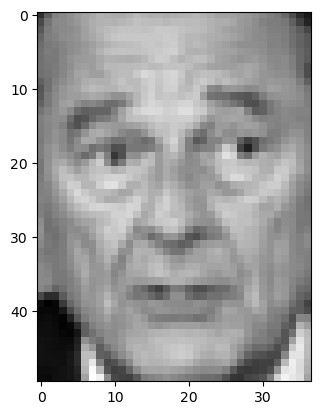

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=3, shuffle=True)
plt.imshow(x_train[0].reshape(images[0].shape), cmap='gray')
plt.show()

In [13]:
#normalising x_train and x_test
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

std_after = x_train.std(axis=0)
mean_after = x_train.mean(axis=0)
print(std_after)
print(mean_after)

[1.0000005 0.9999997 0.9999995 ... 1.0000001 1.0000001 1.0000002]
[-9.9269435e-08  7.0406196e-07 -2.0993921e-06 ... -4.5625254e-07
 -6.0578952e-07 -8.9206372e-07]


In [14]:
class PCA_scratch:
    def __init__(self, capture=0.95):
        self.var_fraction = None
        self.cumulative_var = None
        self.eigen_pairs = []
        self.eigen_vecs = None
        self.eigen_vals = None
        self.w = None
        self.capture = capture
        self.n_comp = None

    #getting eigenvals and eigenvecs after calculating covariance matrix
    def eigenval_eigenvec(self, x):
        cov_mat = np.cov(x.T)
        self.eigen_vals, self.eigen_vecs = np.linalg.eigh(cov_mat)
        #print(self.eigen_vecs.shape)

    #calculating fraction of variation expressed by each axis and the cumulative variance
    def variation_expressed(self):

        tot = sum(self.eigen_vals)
        self.var_fraction = [(i/tot) for i in sorted(self.eigen_vals, reverse=True)]
        self.cumulative_var = np.cumsum(self.var_fraction)

        return self.var_fraction, self.cumulative_var

    #getting number of components that capture a certain fraction of variance
    def number_components(self):
        for i in range(len(self.cumulative_var)):
            if self.cumulative_var[i] >= self.capture:
                self.n_comp = i
                return

    #making pairs of eigenvalues with respect to their eigenvectors
    def make_eigenpairs(self):
        self.eigen_pairs = [(np.abs(self.eigen_vals[i]), self.eigen_vecs[:, i])
                            for i in range(len(self.eigen_vals))]

        self.eigen_pairs.sort(key = lambda k: k[0], reverse=True)


    #projection matrix that transforms the input data into the PC axes
    '''
    x' = xw, w = projection matrix
    '''
    def make_projection_matrix(self):

        self.number_components()
        self.make_eigenpairs()

        self.w = np.empty((self.eigen_vecs.shape[0], self.n_comp))
        # print(self.w.shape)

        for i in range(self.n_comp):
            self.w[:, i] = self.eigen_pairs[i][1]

    #function to calculate values of training set in new PC axes and configure the PCA class with eigenvals and eigenvecs
    def fit_transform(self, x):

        self.eigenval_eigenvec(x)
        self.variation_expressed()
        self.make_projection_matrix()

        return x.dot(self.w)

    #used for transforming test set with already attained eigenvals and eigenvecs
    def transform(self, x):
        return x.dot(self.w)



In [15]:
pca = PCA_scratch(capture=0.99)
x_train_pca = pca.fit_transform(x_train)
# print(x_train_pca)
print(pca.n_comp)

412


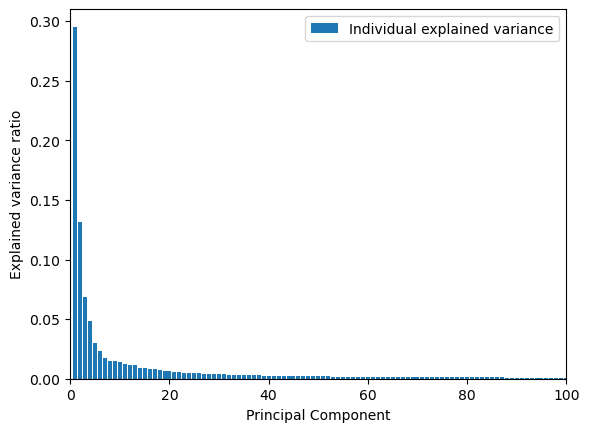

In [16]:
#plotting fraction of variance expressed by each PC axis
plt.bar(range(1, pca.eigen_vals.size+1),
        pca.var_fraction,
        align='center',
        label = 'Individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.xlim(0, 100)
#plt.savefig('explained_variance_ratio.png')
plt.show()

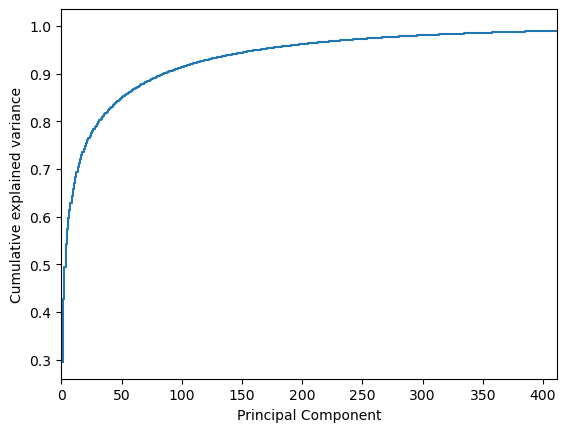

In [17]:
#Plotting cumulative fraction of variance
plt.step(range(1, pca.eigen_vals.size+1), pca.cumulative_var, where='mid',
         label = 'Cumulative explained variance')
plt.xlim(0, pca.n_comp)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal Component')
#plt.savefig('cumulative_variance.png')
plt.show()

In [18]:
x_test_pca = pca.transform(x_test)

<h3>Taking the 3 labels which are present in highest counts</h3>

In [19]:
unique_train, freq_train = np.unique(y_train, return_counts=True)

indices = np.argsort(freq_train)[::-1]
freq_sorted = freq_train[indices]
unique_sorted = unique_train[indices]

highest_three= dict(zip(unique_sorted[0:3], freq_sorted[0:3]))
highest_three

{3: 424, 1: 189, 11: 115}

<h3>Making a projection matrix using first 2 PC axes to plot a graph, visualising separability</h3>

In [20]:
projection_2comp = np.hstack((pca.eigen_pairs[0][1][:, np.newaxis],
                              pca.eigen_pairs[1][1][:, np.newaxis]))

x_train_2comp = x_train.dot(projection_2comp)
x_train_2comp.shape

(1248, 2)

<h3>Graph concludes that only 2 axes haven't been sufficient to separate the classes</h3>

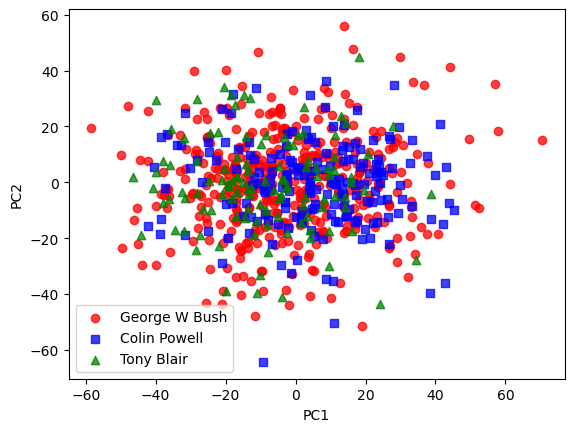

In [21]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for label, c, m in zip(highest_three.keys(), colors, markers):
    plt.scatter(x_train_2comp[y_train == label, 0],
                x_train_2comp[y_train == label, 1],
                c=c, label = f'{titles[label]}', marker=m, alpha=0.75)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
#plt.savefig('PC1_PC2_separability.png')
plt.show()
#shows that data hasn't been separated well on 2 axes

In [22]:
#using a logistic regression model to train the transformed data
lr = LogisticRegression(random_state=3,
                        multi_class='multinomial',
                        solver='newton-cg',
                        n_jobs=-1)

<h4>Clear signs of overfitting</h4>

In [23]:
lr.fit(x_train_pca, y_train)
print(f'Training Accuracy: {lr.score(x_train_pca, y_train)}')
print(f'Test Accuracy: {lr.score(x_test_pca, y_test)}')

Training Accuracy: 1.0
Test Accuracy: 0.782051282051282


In [24]:
#getting the misclassified test labels
preds = lr.predict(x_test_pca)
misclassified_indices = np.where(preds != y_test)[0]
print(misclassified_indices)

[ 11  13  15  20  27  31  41  42  44  58  59  62  67  68  72  74  83  84
  90  97  98 104 106 108 109 116 127 129 132 133 136 138 139 147 149 154
 158 162 169 176 177 180 187 188 193 197 200 206 209 210 214 215 217 225
 231 238 243 246 256 269 274 278 279 281 285 291 298 310]


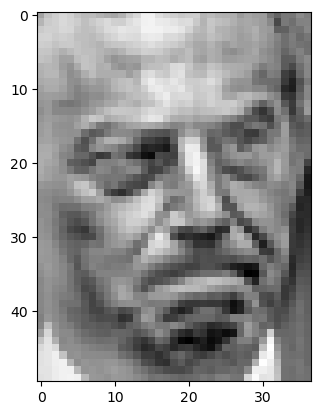

In [25]:
#displaying an image which got misclassified
plt.imshow((x_test[11] * mean + std).reshape(h, w), cmap='gray')
#plt.savefig('misclassified.png')
plt.show()

In [26]:
#getting eigenfaces from the projection matrix
w_dash = pca.w.T
print(w_dash.shape)
eigenfaces = w_dash.reshape(pca.n_comp, h, w)
eigenfaces.shape

(412, 1850)


(412, 50, 37)

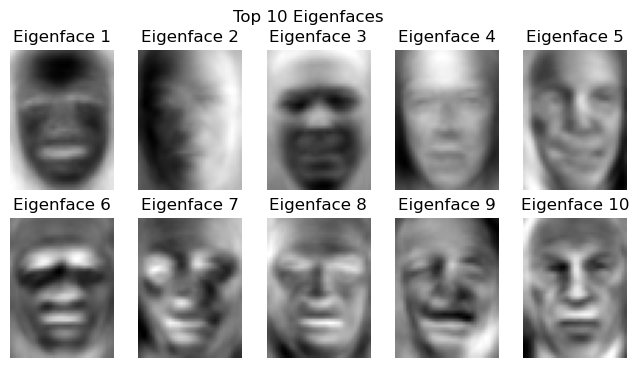

In [27]:
#plotting the first 10 eigenfaces which capture the most variance
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
image_labels = [f'Eigenface {i + 1}' for i in range(10)]

for i in range(2):
    for j in range(5):
        axes[i, j].imshow(eigenfaces[i * 5 + j], cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(image_labels[i * 5 + j])

plt.suptitle('Top 10 Eigenfaces')
#plt.savefig('top_10_eigenfaces.png')
plt.show()

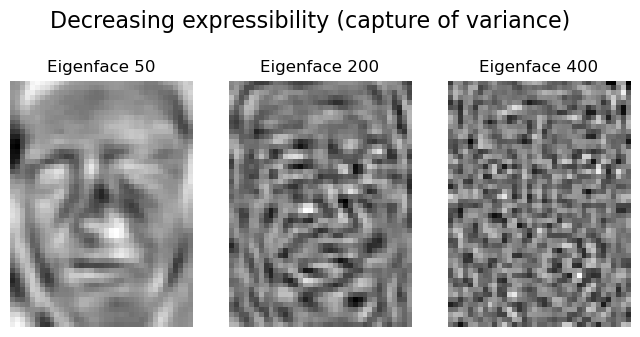

In [28]:
#showing how variance capture decreases as we go deeper
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
image_labels = ['Eigenface 50', 'Eigenface 200', 'Eigenface 400']
indexes = [49, 199, 399]

plt.suptitle('Decreasing expressibility (capture of variance)', fontsize=16)

for i in range(3):
    axes[i].imshow(eigenfaces[indexes[i]], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(image_labels[i])

#plt.savefig('Decreasing_expressibility.png')
plt.show()

In [29]:
#comparing with scikit-learn's PCA
pca_scikit = PCA(n_components=0.99, random_state=1)
x_train_pca = pca_scikit.fit_transform(x_train)
x_test_pca = pca_scikit.transform(x_test)

In [30]:
lr = LogisticRegression(random_state=3,
                        multi_class='multinomial',
                        solver='newton-cg',
                        n_jobs=-1)

lr.fit(x_train_pca, y_train)
print(f'Training Accuracy: {lr.score(x_train_pca, y_train)}')
print(f'Test Accuracy: {lr.score(x_test_pca, y_test)}')

Training Accuracy: 1.0
Test Accuracy: 0.782051282051282


In [32]:
#using different capture values to get accuracies
captures = [0.8, 0.9, 0.92, 0.95, 0.98, 1.]

for val in captures:
    print(f'Variance captured: {val * 100}%')
    pca_loop = PCA_scratch(capture=val)
    x_train_pca = pca_loop.fit_transform(x_train)
    x_test_pca = pca_loop.transform(x_test)

    print(f'Number of components: {pca_loop.n_comp}')

    lr = LogisticRegression(random_state=3,
                            multi_class='multinomial',
                            solver='newton-cg',
                            n_jobs=-1)

    lr.fit(x_train_pca, y_train)
    print(f'Training Accuracy: {lr.score(x_train_pca, y_train)}')
    print(f'Test Accuracy: {lr.score(x_test_pca, y_test)}\n')

Variance captured: 80.0%
Number of components: 31
Training Accuracy: 0.8012820512820513
Test Accuracy: 0.6955128205128205

Variance captured: 90.0%
Number of components: 85
Training Accuracy: 0.9943910256410257
Test Accuracy: 0.75

Variance captured: 92.0%
Number of components: 108
Training Accuracy: 1.0
Test Accuracy: 0.7596153846153846

Variance captured: 95.0%
Number of components: 163
Training Accuracy: 1.0
Test Accuracy: 0.7628205128205128

Variance captured: 98.0%
Number of components: 296
Training Accuracy: 1.0
Test Accuracy: 0.7884615384615384

Variance captured: 100.0%
Number of components: 1246
Training Accuracy: 1.0
Test Accuracy: 0.7852564102564102

